In [1]:
# Chargement et étude rapide du jeu de données
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
import statistics

from sklearn.metrics import confusion_matrix

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_table("heart.dat", sep="\s+", header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,1
266,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,1
267,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
268,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,1


Attribute Information:
------------------------
      -- 1. age       
      -- 2. sex       
      -- 3. chest pain type  (4 values)       
      -- 4. resting blood pressure  
      -- 5. serum cholestoral in mg/dl      
      -- 6. fasting blood sugar > 120 mg/dl       
      -- 7. resting electrocardiographic results  (values 0,1,2) 
      -- 8. maximum heart rate achieved  
      -- 9. exercise induced angina    
      -- 10. oldpeak = ST depression induced by exercise relative to rest   
      -- 11. the slope of the peak exercise ST segment     
      -- 12. number of major vessels (0-3) colored by flourosopy        
      -- 13.  thal: 3 = normal; 6 = fixed defect; 7 = reversable defect     
-- Absence (1), or presence (2) of heart disease

In [4]:
# Renommer les colonnes et regarder les données manquantes (il n'y en a pas)
data.columns = ['age','sex','chest_pain_type','resting_blood_pressure','serum_cholestoral','fasting_blood_sugar',
'resting_electrocardiographic_results','maximum_heart_rate_achieved','exercise_induced_angina','oldpeak',
'slope','number_of_major_vessels','thal','label']
data.isnull().sum()

age                                     0
sex                                     0
chest_pain_type                         0
resting_blood_pressure                  0
serum_cholestoral                       0
fasting_blood_sugar                     0
resting_electrocardiographic_results    0
maximum_heart_rate_achieved             0
exercise_induced_angina                 0
oldpeak                                 0
slope                                   0
number_of_major_vessels                 0
thal                                    0
label                                   0
dtype: int64

Nous remarquons l'abscence des valeurs nulles pour toutes nos variables

In [5]:
print(data.shape)
data

(270, 14)


,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,label
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,1
266,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,1
267,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
268,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,1


1    150
2    120
Name: label, dtype: int64


<AxesSubplot:xlabel='count', ylabel='label'>

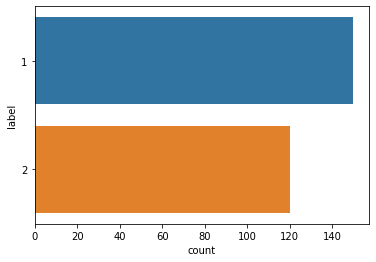

In [6]:
# Répartition graphique des réponses
print(data.label.value_counts())
sns.countplot(y="label", data=data)

Nous obersvons que nos données, ne sont pas équilibrées, en effet ceux qui souffrent d'un problème cardiaque sont moins nombreux par rapport aux personnes saines.
Il faut prendre cette situation dans l'échantillonage de données et le choix de la métrique.

<AxesSubplot:xlabel='label', ylabel='maximum_heart_rate_achieved'>

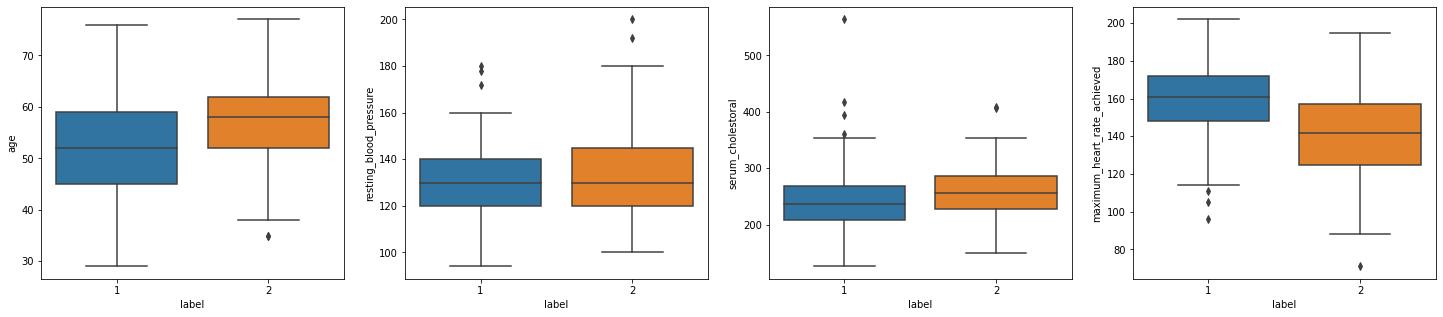

In [7]:
# Répartition graphique des exemples sur un tableau récapitulatif de qlq variables
plt.figure(figsize=(25,5))
plt.subplot(1,4,1)
sns.boxplot(x='label',y='age',data=data)
plt.subplot(1,4,2)
sns.boxplot(x='label',y='resting_blood_pressure',data=data)
plt.subplot(1,4,3)
sns.boxplot(x='label',y='serum_cholestoral',data=data)
plt.subplot(1,4,4)
sns.boxplot(x='label',y='maximum_heart_rate_achieved',data=data)

Pour les variables quantitatives ci-dessus, nous observons la présence de quelques points abbérants 

<AxesSubplot:>

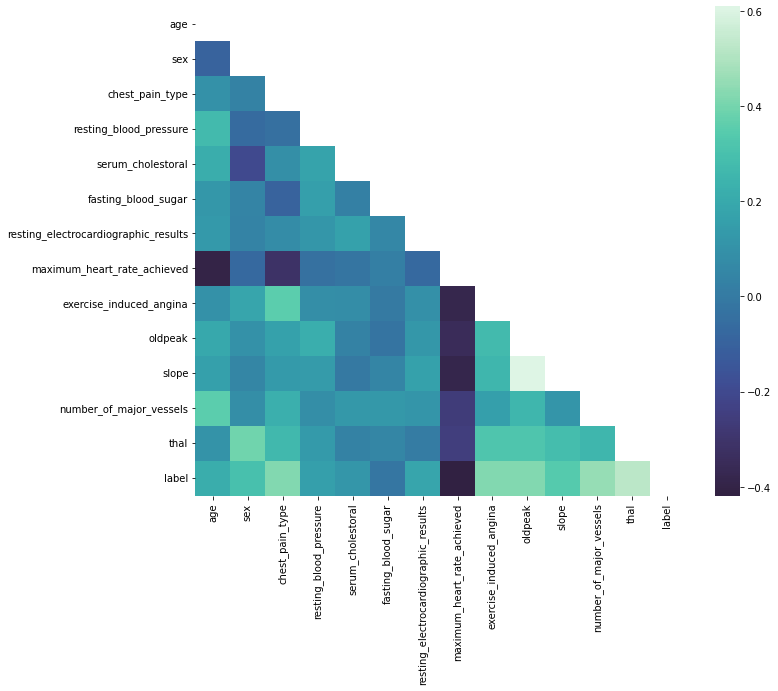

In [8]:
# Matrice de corrélations
data_corr = data.corr()

# masque triangulaire
mask = np.triu(np.ones_like(data_corr, dtype=bool))

# matplolib setup
f, ax = plt.subplots(figsize=(11, 9))

# matrice de corrélation avec masque trinagulaire inférieur
sns.heatmap(data_corr, mask=mask, cmap = 'mako', center=0, square=True)

In [12]:
X = data[data.columns[:-1]]
y = data[data.columns[-1:]]

D'abord, nous allons importer les modules et et classes que nous allons utiliser pour notre démarche.

In [14]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size= 0.80,random_state=0)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pipe.fit(X_train, y_train)
Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])
pipe.score(X_test, y_test)

0.7407407407407407

Dans cette étape et avant toute manipulation, je vais séparer mes données sur trois groupes : un groupe pour l'apprentissage des paramètres (training_set), un groupe pour le choix des hypèr-paramètres (validation_ste) et un groupe pour tester la performance globale du modèle.


In [15]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y,train_size= 0.80,random_state=0)


L'échelle des variables peut impacter négativement la performance de mon modèle, c'est pour cela que je vais définir une étape de transformation de données (normalisation) avant d'alimenter la data au modèle.

In [16]:
scaler= StandardScaler()
scaler.fit(X_train_val)

StandardScaler()

et puis nous allons transformer nos données d'entrainement, de validation et de test

In [17]:
X_train_val = scaler.transform(X_train_val)
X_test = scaler.transform(X_test)

Entrainemnt du modèle et choix des hypère-paramètres.

In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold


# Set up possible values of parameters to optimize over
p_grid = {"C": [1, 10, 100], "gamma": [0.01, 0.1]}

# We will use a Support Vector Classifier with "rbf" kernel
svm = SVC(kernel="rbf")

inner_cv = KFold(n_splits=4, shuffle=True, random_state=1)
outer_cv = KFold(n_splits=4, shuffle=True, random_state=1)

clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv)
nested_score = cross_val_score(clf, X=X_train_val, y=y_train_val, cv=outer_cv)
score = nested_score.mean()
print(score)


0.8703703703703703


Average difference of 0.005864 with std. dev. of 0.008189.


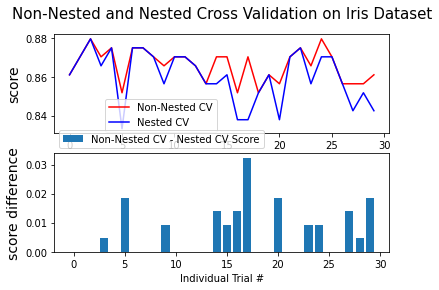

In [21]:
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np

# Number of random trials
NUM_TRIALS = 30




# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=outer_cv)
    clf.fit(X_train_val, y_train_val)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv)
    nested_score = cross_val_score(clf, X=X_train_val, y=y_train_val, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

score_difference = non_nested_scores - nested_scores

print(
    "Average difference of {:6f} with std. dev. of {:6f}.".format(
        score_difference.mean(), score_difference.std()
    )
)

# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
(non_nested_scores_line,) = plt.plot(non_nested_scores, color="r")
(nested_line,) = plt.plot(nested_scores, color="b")
plt.ylabel("score", fontsize="14")
plt.legend(
    [non_nested_scores_line, nested_line],
    ["Non-Nested CV", "Nested CV"],
    bbox_to_anchor=(0, 0.4, 0.5, 0),
)
plt.title(
    "Non-Nested and Nested Cross Validation on Iris Dataset",
    x=0.5,
    y=1.1,
    fontsize="15",
)

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend(
    [difference_plot],
    ["Non-Nested CV - Nested CV Score"],
    bbox_to_anchor=(0, 1, 0.8, 0),
)
plt.ylabel("score difference", fontsize="14")

plt.show()

## Stratégie 1 : ensemble d’apprentissage, de validation et de test. 

In [ ]:
X_av, X_t, y_av, y_t = train_test_split(X, Y, test_size=0.3, random_state=42)
X_a, X_v, y_a, y_v = train_test_split(X_av, y_av, test_size=0.33, random_state=42)
X_a.shape

In [ ]:
# create a scaler object
std_scaler = StandardScaler()
#Normalize
X_a = pd.DataFrame(std_scaler.fit_transform(X_a), columns=X_a.columns)
X_v = pd.DataFrame(std_scaler.fit_transform(X_v), columns=X_v.columns)
X_t = pd.DataFrame(std_scaler.fit_transform(X_t), columns=X_t.columns)
X_t

In [ ]:
X_a.iloc[:,[0,3,4,7,9,11]]

In [ ]:
#k = {1, 5, 10, 15, 20, 25}
def myKNeighClass1(K=1):
    model = KNeighborsClassifier(n_neighbors=K)
    model.fit(X_a, y_a)
    y_a_pred = model.predict(X_a)    
    #print('L’erreur de classification á l\'apprentissage:', round( 1 - accuracy_score(y_a, y_a_pred),2) )
    y_v_pred = model.predict(X_v)
    #print('L’erreur de classification á la validation:', round( 1 - accuracy_score(y_v, y_v_pred),2) )
    return [round( 1 - accuracy_score(y_a, y_a_pred),2), round( 1 - accuracy_score(y_v, y_v_pred),2)]

In [ ]:
def compareModels(myModel, myFunction, myParams=[]):
    MLA_columns = ["Nom du modéle","Erreur de classification en apprentissage","Erreur de classification en validation"]
    MLA_compare = pd.DataFrame(columns = MLA_columns)

    row_index = 0
    for pram in myParams:
        
        errors = myFunction(pram)
        
        MLA_name = myModel+'('+str(pram)+') :'
        MLA_compare.loc[row_index, 'Nom du modéle'] = MLA_name
        
                
        MLA_compare.loc[row_index, "Erreur de classification en apprentissage"] = errors[0]
        MLA_compare.loc[row_index, "Erreur de classification en validation"] = errors[1]

        row_index = row_index + 1

    MLA_compare.sort_values(by = ["Erreur de classification en validation"], ascending = True, inplace = True)
    return MLA_compare

In [ ]:
MLA_compare = compareModels(myModel= 'KNeighClass', myFunction=myKNeighClass1, myParams=[1,5,10,15,20,25])
MLA_compare

In [ ]:
plt.title("MLA")
sns.barplot(x = "Erreur de classification en validation", y = "Nom du modéle", data = MLA_compare)

In [ ]:
plt.title("MLA")
sns.barplot(x = "Erreur de classification en apprentissage", y = "Erreur de classification en validation", hue ="Nom du modéle", data = MLA_compare)

In [ ]:
#K=10 est le meilleur paramètre, car il présente l'erreur de validation la plus faible.

In [ ]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_a, y_a)
y_t_pred = model.predict(X_t)   
print('L’erreur de classification au test:', round( 1 - accuracy_score(y_t, y_t_pred),2) )

## Stratégie 2 : validation-croisée pour la sélection de k

In [ ]:
X_av, X_t, y_av, y_t = train_test_split(X, Y, test_size=0.3, random_state=42)
#Normalisation
std_scaler = StandardScaler()
X_av = pd.DataFrame(std_scaler.fit_transform(X_av), columns=X_av.columns)
X_t = pd.DataFrame(std_scaler.fit_transform(X_t), columns=X_t.columns)
X_av.shape

In [ ]:
#k = {1, 5, 10, 15, 20, 25}
def myKNeighClass2(K=1):
    model = KNeighborsClassifier(n_neighbors=K)
    accuracies = cross_val_score(model, X_av, y_av, cv=5)
    #print('L’erreur de classification est:', round( 1 - statistics.mean(accuracies),2))
    return round( 1 - statistics.mean(accuracies),2)

In [ ]:
def compareModels1(myModel, myFunction, myParams=[]):
    MLA_columns = ["Nom du modéle","Erreur de classification"]
    MLA_compare = pd.DataFrame(columns = MLA_columns)

    row_index = 0
    for param in myParams:
        
        error = myFunction(param)
        
        MLA_name = myModel+'('+str(param)+') :'
        MLA_compare.loc[row_index, 'Nom du modéle'] = MLA_name
        
                
        MLA_compare.loc[row_index, "Erreur de classification"] = error

        row_index = row_index + 1

    MLA_compare.sort_values(by = ["Erreur de classification"], ascending = True, inplace = True)
    return MLA_compare

In [ ]:
MLA_compare = compareModels1(myModel= 'CrossVal KNeighClass', myFunction=myKNeighClass2, myParams=[1,5,10,15,20,25])
MLA_compare

In [ ]:
plt.title("MLA")
sns.barplot(x = "Erreur de classification", y = "Nom du modéle", data = MLA_compare)

In [ ]:
#10, 15 restent les bons choix

In [ ]:
#K=10
model = KNeighborsClassifier(n_neighbors=10)
accuracies = cross_val_score(model, X_t, y_t, cv=5)
print('L’erreur de classification K= 10 est:', round( 1 - statistics.mean(accuracies),2))

In [ ]:
#K=15
model = KNeighborsClassifier(n_neighbors=15)
accuracies = cross_val_score(model, X_t, y_t, cv=5)
print('L’erreur de classification K= 15 est:', round( 1 - statistics.mean(accuracies),2))

## On a deux méthodes qui donnent l'erreur de classification en test la plus faible (0.17).    
## Donc, on a le choix entre 2 méthodes:
### +KNeighborsClassifier(15) avec cross_val (cv=5)
### +KNeighborsClassifier(10) sans cross_val

In [ ]:
#exp de matrice de confusion:
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
print(tn, fp, fn, tp)
conf_mat = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0])
conf_mat

### Matrice de confusion

#### --------- Predicted class  
#### -------------   1 ---   2
#### -Actual  1 | TN | FP |
#### --Class   2 | FN | TP | 

-- Négatif: Absence (1)
-- Positif: Presence (2) of heart disease

Accuracy = (TP+TN) / (TP+TN+FN+FP)
 
Dans notre cas, prédire une absence d’attaque cardiaque lorsqu’en réalité cette attaque cardiaque a lieu => (FN)
=>  5 fois plus couteux => FN*5 (Afin de pénaliser).

#### Notre nouvelle formule de l'accuracy: Accuracy = (TP+TN) / (TP+TN+FN*5+FP)  
    

In [ ]:
#+KNeighborsClassifier(15) avec cross_val (cv=5)

In [ ]:
X_av, X_t, y_av, y_t = train_test_split(X, Y, test_size=0.3, random_state=42)
#Normalisation
X_t = pd.DataFrame(std_scaler.fit_transform(X_t), columns=X_t.columns)

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
model = KNeighborsClassifier(n_neighbors=15)
y_pred = cross_val_predict(model, X_t, y_t, cv=5)

tn, fp, fn, tp = confusion_matrix(y_t, y_pred).ravel()
print(tn, fp, fn, tp)
#Affichage du MC
conf_mat = confusion_matrix(y_t, y_pred)
conf_mat

In [ ]:
my_accuracy = (tn + tp) / (tn + tp + fp + (fn*5))
print('L’erreur de classification KNeighborsClassifier(15) avec cross_val (cv=5) est:', round( 1 - my_accuracy,2))

In [ ]:
#+KNeighborsClassifier(10) sans cross_val

In [ ]:
X_a, X_t, y_a, y_t = train_test_split(X, Y, test_size=0.3, random_state=42)
# create a scaler object
std_scaler = StandardScaler()
X_a = pd.DataFrame(std_scaler.fit_transform(X_a), columns=X_a.columns)
X_t = pd.DataFrame(std_scaler.fit_transform(X_t), columns=X_t.columns)

In [ ]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_a, y_a)
y_t_pred = model.predict(X_t) 

tn, fp, fn, tp = confusion_matrix(y_t, y_pred).ravel()
print(tn, fp, fn, tp)
#Affichage du MC
conf_mat = confusion_matrix(y_t, y_pred)
conf_mat

In [ ]:
my_accuracy = (tn + tp) / (tn + tp + fp + (fn*5))
print('L’erreur de classification KNeighborsClassifier(10) sans cross_val est:', round( 1 - my_accuracy,2))